# Support Vector Machine

## Prepare data

In [1]:

from common import concatenate_features, extract_features, load_audio
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from time import time

wav_files = list(map(lambda f: 'wavs/' + f, os.listdir('wavs/')))
male_voices, female_voices = load_audio(wav_files)

male_features = extract_features(male_voices)
female_features = extract_features(female_voices)

male_concatenated = concatenate_features(male_features)
female_concatenated = concatenate_features(female_features)

X = np.vstack((male_concatenated, female_concatenated))
y = np.append([0] * len(male_concatenated), [1] * len(female_concatenated))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

100%|██████████| 300/300 [00:00<00:00, 739.45it/s] 


## Create classifier

In [3]:
clf = SVC(kernel='rbf')

# Train the model
start = time()
clf.fit(X_train[:50000], y_train[:50000])
end = time()
print('Training time: {} seconds'.format(end - start))

# Test the classifier
start = time()
y_pred = clf.predict(X_test[:10000])
end = time()
print('Testing time: {} seconds'.format(end - start))

Training time: 48.490631341934204 seconds
Testing time: 19.39442801475525 seconds


## Confusion matrix

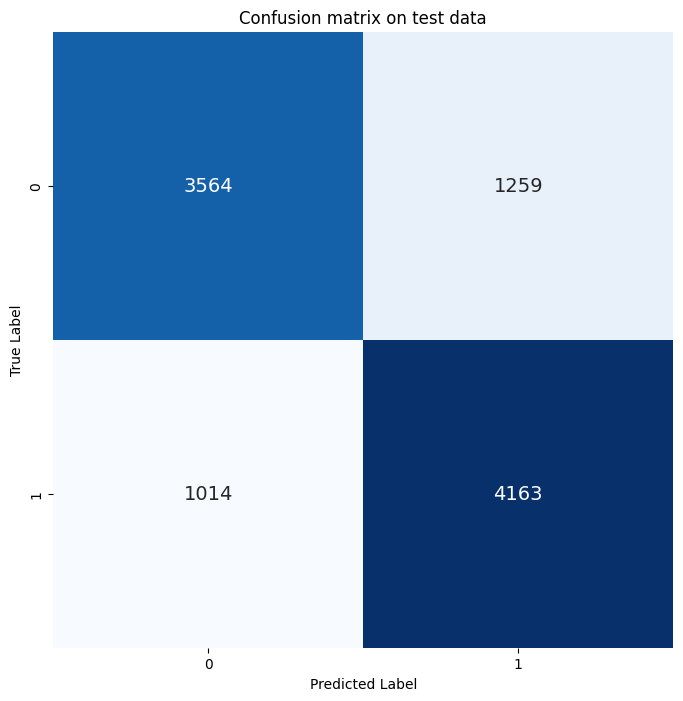

In [4]:
cm = confusion_matrix(y_test[:10000], y_pred)

# Create the confusion matrix display
plt.figure(figsize=(8,8))
plt.title('Confusion matrix on test data')
sns.heatmap(cm, annot=True, fmt='d', 
            cmap=plt.cm.Blues, cbar=False, annot_kws={'size':14})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Stats

In [5]:
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

accuracy = clf.score(X_train[:10000], y_train[:10000])
sensitivity = true_positive / (false_negative + true_positive)

print("SVM Accuracy: ", accuracy)
print("SVM Sensitivity: ", sensitivity)

SVM Accuracy:  0.7963
SVM Sensitivity:  0.7785058977719528


## Your turn!

In [7]:
import librosa
from pydub import AudioSegment

user_file = input('Enter the path to the audio file: ')

if not os.path.isfile(user_file):
    print('File not found!')
    # exit without killing kernel
    raise SystemExit

# get file format
file_format = user_file.split('.')[-1]
if file_format != 'wav':
    sound = AudioSegment.from_file(user_file, format=file_format)
    sound.export('user_audio.wav', format='wav')
    user_file = 'user_audio.wav'

audio_file = librosa.load(user_file)

pruebas = np.array([list(audio_file)], dtype=object)

prueba_features = extract_features(pruebas)

prediccion = clf.predict(prueba_features[0])

total = len(prediccion)
hombres = len(prediccion[prediccion == 0])
mujeres = len(prediccion[prediccion == 1])

if hombres > mujeres:
    print('El audio es de un hombre, con un {:.2f}% de confianza'.format(hombres / total * 100))
else:
    print('El audio es de una mujer, con un {:.2f}% de confianza'.format(mujeres / total * 100))

100%|██████████| 1/1 [00:00<00:00, 17.67it/s]


El audio es de un hombre, con un 59.35% de confianza
